<h1> Project on  Classification : Prediction of House Grade </h1>
<p> Instructor : Mr. Shriraman Rajagopalan <br>By: Kalyan Chatterjee<p>


<h3/><font color="green">Aim of The Project:<font></h3>
<p>We have been provided with a dataset containing different house's data in a city. We need to analyze the dataset to find different patterns and Grade the city. This would help agents in identifying the type of house a customer is looking for! and the search for the house can be narrowed down by focusing only on the 'condition of the house!'<p>
  

In [1]:
import matplotlib.pyplot as plt             # to visualize              
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np  
from tabulate import tabulate
from ipywidgets import interact
import ipywidgets as widgets
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

<h3>Importing Dataset

In [2]:
df= pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


# Data Description

In [3]:
df.keys() # These are the necessary columns

Index(['Id', 'Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')

In [4]:
df.shape

(3000, 14)

The Dataset contains total 3000 instances and 14 Features.

<p> <big><b><u><font color= 'purple'>Data Dictionary <p>

1. Id : (String) - Unique Property ID
2. Area(total) : (Float) - Area of the Property
3. Trooms: (Int) - Total Nuumer of Rooms
4. Nbedrooms : (Float) - Total number of Bedrooms.
5. Nbwashrooms: (Int) - Total Number of attached Washroom.
6. Twashrooms : (Int)- Total Number of" Washroom
7. roof : (String) - Access to Roof
                    "Yes"- Roof is accessable
                    "No" - Roof is not accessable
                    
8. Roof(Area) : (Float) - Area of the Roof
9. Lawn(Area): (Float) - Area of the Lawn 
10. Nfloors : (Int) - Number of Floors
11. API: (Int) - Air Polution Index
12. ANB: (Int) - Average Number of Belongings
13. Expected price (Float) : Expected price of the Property
14. Grade: (String) - Grade of the House/Property

In [5]:
df.info() #Infor of the dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


<h3> Data Cleaning

In [6]:
#Checking for Null Values
df.isna().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [7]:
#Checking for Duplicate entries
df.drop("Id",axis=1).duplicated().sum()

0

There is neither any null value or any duplicate entry present in the given Dataset.

<h3>Isolating Categorical and Continuous Data

In [8]:
cat=[]
cont=[]
for col in df.keys():
    if df[col].nunique() > 10:
        cont.append(col)
    else:
        cat.append(col)
        
print(tabulate({"Categorical":cat,"Continuous":cont},headers="keys"))

Categorical    Continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


In [9]:
for i in cat:
    print(f"Value Counts for {i} Features")
    print(df[i].value_counts())
    print()

Value Counts for Trooms Features
9    641
6    634
7    586
5    574
8    565
Name: Trooms, dtype: int64

Value Counts for Nbedrooms Features
4    623
5    600
6    573
3    410
7    393
8    226
2    175
Name: Nbedrooms, dtype: int64

Value Counts for Nbwashrooms Features
4    590
5    584
3    550
6    475
7    310
2    288
8    116
1     87
Name: Nbwashrooms, dtype: int64

Value Counts for Twashrooms Features
5     585
6     580
7     532
4     407
8     398
9     208
3     183
10     57
2      50
Name: Twashrooms, dtype: int64

Value Counts for roof Features
YES    1543
NO     1457
Name: roof, dtype: int64

Value Counts for Nfloors Features
3    640
5    592
4    567
6    436
2    395
7    186
1    184
Name: Nfloors, dtype: int64

Value Counts for ANB Features
5    538
2    527
4    513
1    498
3    467
6    457
Name: ANB, dtype: int64

Value Counts for Grade Features
D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64



# Exploratory Data Analysis

<h3/>Univariate Analysis: Continuous Data</h3>

<AxesSubplot:xlabel='Area(total)', ylabel='Density'>

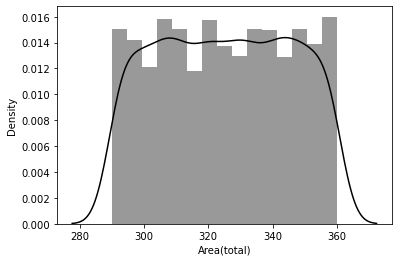

In [10]:
sns.distplot(df["Area(total)"],color="black")

The number of properties with area in the range 300 sqft to 360 sqft is almost uniform

<AxesSubplot:xlabel='Expected price', ylabel='Density'>

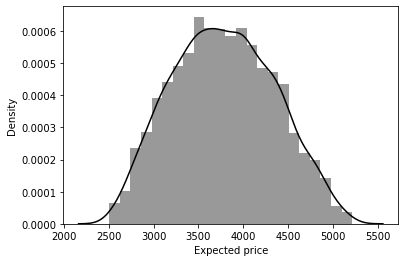

In [11]:
sns.distplot(df["Expected price"],color="black")

Expected price is Normally Distributed

<AxesSubplot:xlabel='API', ylabel='Density'>

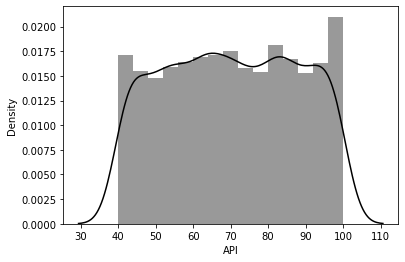

In [12]:
sns.distplot(df["API"],color="black")

Air Polution index is uniformly distributed.

<h3/>Univariate Analysis: Categorical Data</h3>

In [13]:
pal= ["#659EC7","#4EE2EC","#AAF0D1","#2E8B57","#F5DEB3","#EE9A4D","#C11B17","#033E3E","#033E3E"]
def uni_count_plot(df,col):
    ax=sns.countplot(df[col],linewidth=3,palette=pal[:df[col].nunique()])
    for bar in ax.patches:
        h= bar.get_height()
        str1= str(h)
        x= bar.get_x()+bar.get_width()/2
        ax.annotate(str1, (x, h), va = "bottom", ha ="center" )

In [14]:
cat

['Trooms',
 'Nbedrooms',
 'Nbwashrooms',
 'Twashrooms',
 'roof',
 'Nfloors',
 'ANB',
 'Grade']

Text(0.5, 1.1, 'Number of properties with different number of Bed rooms')

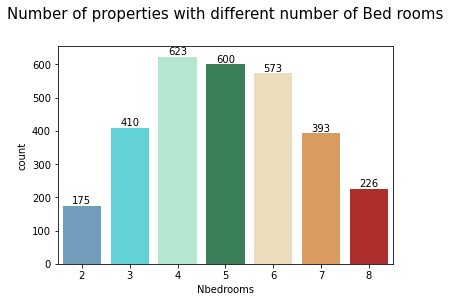

In [15]:
uni_count_plot(df,"Nbedrooms")
plt.title("Number of properties with different number of Bed rooms",size=15,y=1.1)

Majority of the properties are having bedrooms between 4 to 6

Text(0.5, 1.1, 'Number of properties with different Grade')

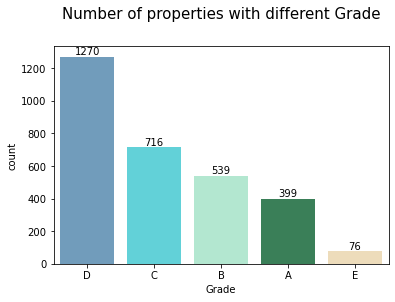

In [16]:
uni_count_plot(df,"Grade")
plt.title("Number of properties with different Grade",size=15,y=1.1)

Majority of the properties are of Grade "D",\
While condition of 76 properties are worst.

# Bivariate Analysis

Text(0.5, 1.0, 'Average Price for Different Grade of Properties')

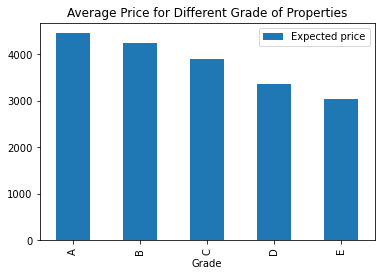

In [17]:
pd.pivot_table(df,index= "Grade",values= ["Expected price"]).plot(kind="bar")
plt.title("Average Price for Different Grade of Properties")

<b>We can see from the plot that Price of a property increases with increase in its Grade.

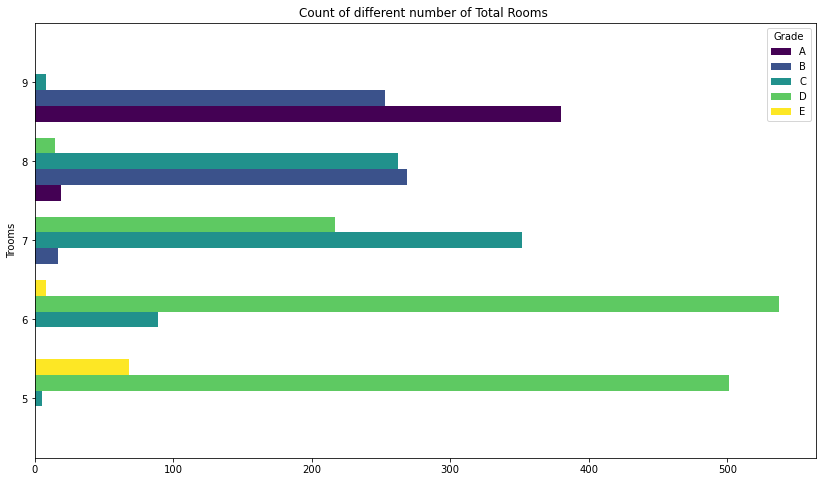

In [18]:
pd.crosstab(df.Trooms,df.Grade).plot(kind='barh',figsize=(14,8),colormap="viridis",width=1)
plt.title("Count of different number of Total Rooms ")
plt.show()

<b>Mostly properties with number of rooms more than 7 are in "Good" condition i.e. rating = "A" or "B".
    And most of the properties with number of rooms less than 7 are in very "Bad" condition i.e. Rating = "D" or "E"

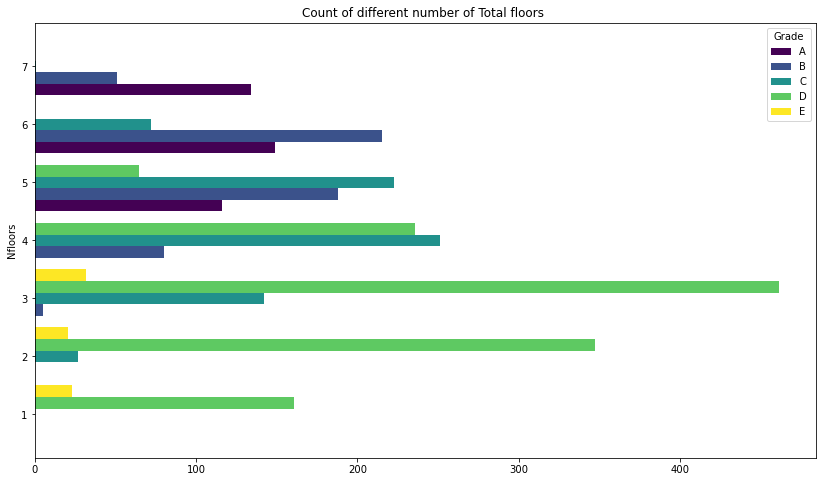

In [19]:
pd.crosstab(df.Nfloors,df.Grade).plot(kind='barh',figsize=(14,8),colormap="viridis",width=1)
plt.title("Count of different number of Total floors ")
plt.show()

<b> Properties with number of floors more than 4 are in very good Condition

# Multivariate Analysis

Text(0.5, 1.0, 'Area vs Price for different Grades')

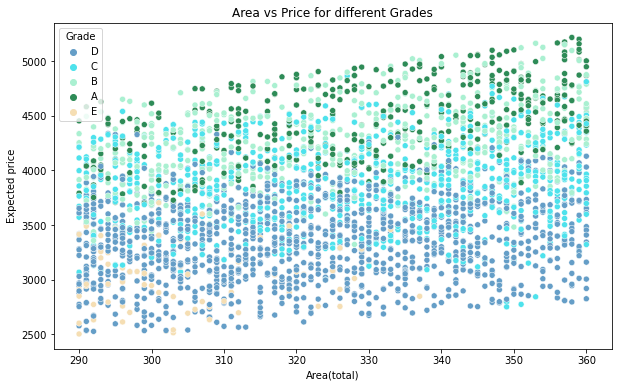

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(df["Area(total)"],df["Expected price"],hue=df["Grade"],palette=pal[:5])
plt.title("Area vs Price for different Grades")

<b><li/>In the above scatter plot it is clearly visible that price of a property depends on its Grade.
For grades "A" and "B" the prices are higher and for  grades "D" and "E" price is on the lower side comparatively.</li>

<b><li>on the other hand we can see that Grading does not have an impact on the Properties. 

In [21]:
pd.pivot_table(df,index= "Grade",values= ["API"])

,API
Grade,
A,71.857143
B,71.775510
C,71.509777
D,69.155906
E,55.065789


<b>Average Air Polution Index is very poor for properties with Grade "E".

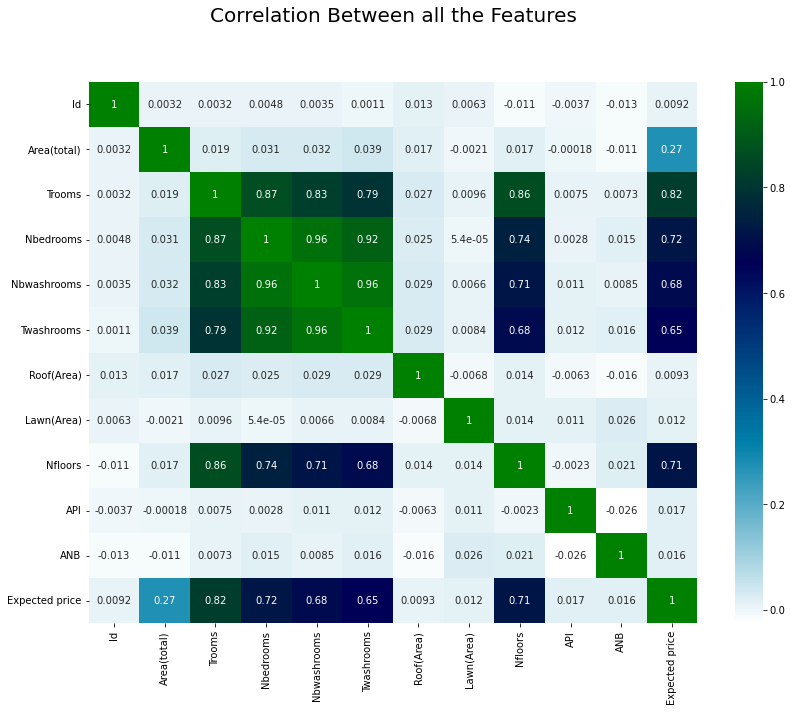

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="ocean_r")
plt.title("Correlation Between all the Features",size="20",y=1.1)
plt.tight_layout()

<li>In the above heatmap we can see that Price of a property have a very high correlation with number of rooms. Therefore, number of rooms influence the grade of the property. 
<li>Number of Bedrooms and Number of floors also have high influence on the price of a property and so on the Grade of a Property.
<li>It is also visible in the Heatmap that Total Area, Roof Area and Lawn area has no influence on price and so on Grade.

# <font color="green"/>Building Predictive Model using Machine Learning </font>

<h2>Algorithms that we will consider:-</h2>

1. DecisionTreeClassifier
2. Knn - Classifier
3. Support Vector Classifier
4. Naive Bayes Classifier
5. Random Forest Classifire
6. Adaboost Classifier

<h2>Preparing Data

As per the above analysis we are considering the following features for our Regression Model.

1. Area(Total)
2. Trooms
3. Nbedrooms
4. Nbwashrooms
5. 'Twashrooms'
6. roof
7. Nfloors
8. Expected price


In [23]:
X = df.drop(["Grade","Id","API","ANB","Roof(Area)","Lawn(Area)"],axis=1)
y = df["Grade"]

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state = 13)


enc_x=LabelEncoder()

X_train["roof"]=enc_x.fit_transform(X_train["roof"])
X_test["roof"]=enc_x.fit_transform(X_test["roof"])

enc_y=LabelEncoder()

y_train=enc_y.fit_transform(y_train)
y_test=enc_y.fit_transform(y_test)


In [24]:
def model_evaluator(model):
    
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    
    acc_test= accuracy_score(y_test,y_pred,)
    cv_score= np.mean(cross_val_score(model,X_train,y_train,cv=5))
    rec= recall_score(y_test,y_pred,average="weighted")
    fs = f1_score(y_test,y_pred,average="weighted")
    ps= precision_score(y_test, y_pred,average="weighted")
    
    print("Accuracy: ",acc_test)
    print("Recall Score: ", rec)
    print("f1_score: ",fs)   
    print("Precision score: ",ps)   
    print("Cross Validation Score",cv_score)
    
    print()
    print("\t\t\tClassification Report")
    print("---------------------------------------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    
    return acc_test,rec,fs,ps,cv_score

In [25]:
scaler = MinMaxScaler()

<h5>Model 1: Decision Tree Classifier

In [26]:
dtree_model = DecisionTreeClassifier(random_state=1)

param_grid = {'max_depth': [2,3, 4, 5,6,7,8,9,10]}

grid_dt = GridSearchCV(dtree_model, param_grid, cv=5,scoring="accuracy")

grid_dt.fit(X_train, y_train)

grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=7, random_state=1)

In [27]:
dtree_model = DecisionTreeClassifier(max_depth=7,random_state=1)
scaler = MinMaxScaler()
steps= [("scaler",scaler),("dtree_model",dtree_model)]
pipe_dt= Pipeline(steps=steps)
acc_test_dt,rec_dt,fs_dt,ps_dt,cv_score_dt=model_evaluator(pipe_dt)

Accuracy:  0.8366666666666667
Recall Score:  0.8366666666666667
f1_score:  0.8317623737031616
Precision score:  0.831984283365137
Cross Validation Score 0.8350000000000002

			Classification Report
---------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        81
           1       0.82      0.74      0.78       118
           2       0.76      0.84      0.80       130
           3       0.90      0.92      0.91       253
           4       0.50      0.22      0.31        18

    accuracy                           0.84       600
   macro avg       0.76      0.72      0.73       600
weighted avg       0.83      0.84      0.83       600



<h5>Model 2: Knn-Classifier

In [28]:
knn = KNeighborsClassifier()

r= list(range(3,101,2))

param_grid= {'n_neighbors' :r}

grid_knn = GridSearchCV(knn, param_grid, cv=5,scoring="accuracy")

grid_knn.fit(X_train, y_train)

grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=69)

In [29]:
knn = KNeighborsClassifier(n_neighbors=69)
scaler = MinMaxScaler()
steps= [("scaler",scaler),("knn",knn)]
pipe_knn= Pipeline(steps=steps)
acc_test_knn,rec_knn,fs_knn,ps_knn,cv_score_knn=model_evaluator(pipe_knn)

Accuracy:  0.8683333333333333
Recall Score:  0.8683333333333333
f1_score:  0.856812868621195
Precision score:  0.8721947458340181
Cross Validation Score 0.8637500000000001

			Classification Report
---------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        81
           1       0.84      0.81      0.82       118
           2       0.80      0.85      0.83       130
           3       0.90      0.96      0.93       253
           4       1.00      0.06      0.11        18

    accuracy                           0.87       600
   macro avg       0.89      0.71      0.72       600
weighted avg       0.87      0.87      0.86       600



<h5>Model 3: SVC

In [30]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C = 2)
steps= [("scaler",scaler),("svm",svm)]
pipe_svm= Pipeline(steps=steps)
acc_test_svc,rec_svc,fs_svc,ps_svc,cv_score_svc=model_evaluator(pipe_svm)

Accuracy:  0.8833333333333333
Recall Score:  0.8833333333333333
f1_score:  0.8715859446159374
Precision score:  0.8865440769481224
Cross Validation Score 0.885

			Classification Report
---------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        81
           1       0.88      0.83      0.85       118
           2       0.84      0.88      0.86       130
           3       0.90      0.96      0.93       253
           4       1.00      0.06      0.11        18

    accuracy                           0.88       600
   macro avg       0.91      0.73      0.73       600
weighted avg       0.89      0.88      0.87       600



<h5>Model 4: Naive-Bias-Classifier

In [31]:
nb = GaussianNB()
scaler = MinMaxScaler()
steps= [("scaler",scaler),("nb",nb)]
pipe_nb= Pipeline(steps=steps)
acc_test_nb,rec_nb,fs_nb,ps_nb,cv_score_nb=model_evaluator(pipe_nb)

Accuracy:  0.82
Recall Score:  0.82
f1_score:  0.8249176293614421
Precision score:  0.8347731999436389
Cross Validation Score 0.7745833333333333

			Classification Report
---------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        81
           1       0.78      0.82      0.80       118
           2       0.74      0.78      0.76       130
           3       0.93      0.83      0.88       253
           4       0.42      0.72      0.53        18

    accuracy                           0.82       600
   macro avg       0.75      0.80      0.77       600
weighted avg       0.83      0.82      0.82       600



<h5>Model 5: Random Forest Classifier

In [32]:
param_grid = {'n_estimators': list(range(50,500,25))
             }
grid_rdf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5)
grid_rdf.fit(X_train, y_train)
grid_rdf.best_estimator_

RandomForestClassifier(n_estimators=475, random_state=1)

In [33]:
rdf = RandomForestClassifier(n_estimators=475,random_state=1, n_jobs=-1,criterion='entropy')
scaler = MinMaxScaler()
steps= [("scaler",scaler),("rdf",rdf)]
pipe_rdf= Pipeline(steps=steps)
acc_test_rdf,rec_rdf,fs_rdf,ps_rdf,cv_score_rdf=model_evaluator(pipe_rdf)

Accuracy:  0.8766666666666667
Recall Score:  0.8766666666666667
f1_score:  0.8729968112826485
Precision score:  0.8756482284288022
Cross Validation Score 0.8779166666666667

			Classification Report
---------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        81
           1       0.88      0.81      0.84       118
           2       0.80      0.87      0.83       130
           3       0.92      0.93      0.93       253
           4       0.75      0.33      0.46        18

    accuracy                           0.88       600
   macro avg       0.85      0.78      0.79       600
weighted avg       0.88      0.88      0.87       600



<h5>Model 6: Adaboost Classifier

In [34]:
rdf = RandomForestClassifier(n_estimators=475,random_state=1, n_jobs=-1,criterion='entropy')
adareg= AdaBoostClassifier(rdf)
steps= [("scaler",scaler),("adareg",adareg)]
pipe_ada=Pipeline(steps=steps)
acc_test_ada,rec_ada,fs_ada,ps_ada,cv_score_ada=model_evaluator(pipe_ada)

Accuracy:  0.8783333333333333
Recall Score:  0.8783333333333333
f1_score:  0.8752843241000103
Precision score:  0.8777700459446474
Cross Validation Score 0.8774999999999998

			Classification Report
---------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        81
           1       0.88      0.80      0.84       118
           2       0.81      0.87      0.84       130
           3       0.92      0.94      0.93       253
           4       0.78      0.39      0.52        18

    accuracy                           0.88       600
   macro avg       0.85      0.79      0.81       600
weighted avg       0.88      0.88      0.88       600



<h5>Comparison of all the 6 Models

In [35]:
# Comparing Different Models:

model_name= ["DecisionTreeClassifier",
"Knn - Classifier",
"Support Vector Classifier",
"Naive Bayes Classifier",
"Random Forest Classifire",
 "Adaboost Classifier"]

Accuracy=[acc_test_dt,acc_test_knn,acc_test_svc,acc_test_nb,acc_test_rdf,acc_test_ada]
recall_score=[rec_dt,rec_knn,rec_svc,rec_nb,rec_rdf,rec_ada]
f1_score=[fs_dt,fs_knn,fs_svc,fs_nb,fs_rdf,fs_ada]
precision_score=[ps_dt,ps_knn,ps_svc,ps_nb,ps_rdf,ps_ada]
CV_score=[cv_score_dt,cv_score_knn,cv_score_svc,cv_score_nb,cv_score_rdf,cv_score_ada]


Error_name = {"Accuracy":Accuracy,
              "recall_score":recall_score,
              "f1_score":f1_score,
              "precision_score":precision_score,
              "CV_score":CV_score}

pd.DataFrame(Error_name, index=model_name)

,Accuracy,recall_score,f1_score,precision_score,CV_score
DecisionTreeClassifier,0.836667,0.836667,0.831762,0.831984,0.835000
Knn - Classifier,0.868333,0.868333,0.856813,0.872195,0.863750
Support Vector Classifier,0.883333,0.883333,0.871586,0.886544,0.885000
Naive Bayes Classifier,0.820000,0.820000,0.824918,0.834773,0.774583
Random Forest Classifire,0.876667,0.876667,0.872997,0.875648,0.877917
Adaboost Classifier,0.878333,0.878333,0.875284,0.877770,0.877500


<b>From the above Comparison Report we understand that out of all the 6 classification models <br>
Support Vector Classifiers gives us the best output. <br>
Therefore, for further analysis we are considering SVC as our Final Model

<h2><font color="green">Final Model:- Support Vector Classifier

In [36]:
svm = SVC(kernel = 'linear', C = 1,probability =True)
steps= [("scaler",scaler),("svm",svm)]
pipe_svm= Pipeline(steps=steps)
pipe_svm.fit(X_train,y_train)
y_pred= pipe_svm.predict(X_test)
print(classification_report(y_test,y_pred))

print("The Accuracy of the model is: ", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        81
           1       0.88      0.85      0.86       118
           2       0.83      0.89      0.86       130
           3       0.90      0.96      0.93       253
           4       0.00      0.00      0.00        18

    accuracy                           0.88       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.86      0.88      0.87       600

The Accuracy of the model is:  0.8816666666666667


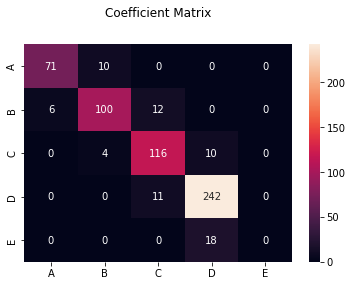

In [37]:
df_conf=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["A","B","C","D","E"],index=["A","B","C","D","E"])
sns.heatmap(df_conf,annot=True,fmt='.3g')

plt.title("Coefficient Matrix",y=1.1)

plt.show()

In [38]:
y_prediction= enc_y.inverse_transform(y_pred)
y_test1= enc_y.inverse_transform(y_test)

df_pred_test= X_test.copy()                                                   

df_pred_test["roof"]=enc_x.inverse_transform(X_test["roof"])

df_pred_test["Actual label"]= y_test1
df_pred_test["Predicted Label"]= y_prediction

In [39]:
df_pred_test

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Nfloors,Expected price,Actual label,Predicted Label
1626,291,6,3,3,5,NO,3,3490,E,D
2420,301,8,6,5,7,NO,5,4184,C,C
2750,330,5,4,3,4,NO,2,3440,D,D
1134,295,9,8,7,8,YES,7,4097,A,A
1737,318,7,6,5,6,YES,4,3229,C,C
...,...,...,...,...,...,...,...,...,...,...
1131,355,6,4,4,5,YES,3,3998,D,C
2899,311,5,3,3,4,NO,2,3454,D,D
79,306,6,5,5,7,YES,4,3070,D,D
1619,313,5,2,2,4,NO,1,3231,D,D


# <font color="green">Grading of a House using ML model

In [40]:
# Required Widgets

price_wid= widgets.BoundedFloatText(
    value=100,
    min=0,
    max=10000.0,
    step=0.1,
    description='Price',
    disabled=False
)

Area_wid=widgets.BoundedFloatText(
    value=300,
    min=0,
    max=1000.0,
    step=0.1,
    description='Total Area',
    disabled=False
)

Trooms_wid= widgets.Dropdown(
    options= list(range(1,10)),
    description='Total Rooms:',
    disabled=False,
)


Nbedrooms_wid=  widgets.Dropdown(
    options= list(range(1,10)),
    description='Bed Rooms:',
    disabled=False,
)

Nbwashrooms_wid = widgets.Dropdown(
    options= list(range(1,10)),
    description='Att_WashRooms :',
    disabled=False,)


Twashrooms_wid=widgets.Dropdown(
    options= list(range(1,10)),
    description='Washroom:',
    disabled=False,
)

roof_wid=widgets.RadioButtons(
    options=["Yes","NO"],
    description='Roof',
    disabled=False
)

    
Nfloors_wid=widgets.Dropdown(
    options= list(range(1,10)),
    description='Floors:',
    disabled=False)


In [41]:
def House_label(price,area,Trooms,Nbedrooms, Nbwashrooms, Twashrooms,
    roof,  Nfloors):
    
    if roof=="Yes":
        roof_b=1
        
    else:
        roof_b=0
    
    v=[area,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof_b,Nfloors,price]
    
    num_rating = pipe_svm.predict([v])
    
    if num_rating==0:
        grade="A"
    elif num_rating==1:
        grade = "B"
    elif num_rating==2:
        grade = "C"
    elif num_rating==3:
        grade = "D"
    else:
        grade = "E"
        
    print()
    
    for i in tqdm(range(2000000)):
        pass
    
    print()
    print("The Grade of the room is = ",grade)

In [42]:
print("Please Enter Requirement: ")
interact(House_label,price=price_wid,area=Area_wid,Trooms=Trooms_wid,Nbedrooms=Nbedrooms_wid,Nbwashrooms=Nbwashrooms_wid, Twashrooms=Twashrooms_wid,
       roof=roof_wid, Nfloors=Nfloors_wid);

Please Enter Requirement: 


interactive(children=(BoundedFloatText(value=100.0, description='Price', max=10000.0, step=0.1), BoundedFloatT…

<h3/><font color= "green">Conclusion:</h3> <br>

1. Grade is high for properties with Total rooms mode than 7 and Grade is Low for most of the properties with number of rooms less than 7.
2. Price of a property is increasing with increase in Grade.
3. Air quality is very less for properties with Grade "E".
4. Grade also improves with increase in number of floors and washrooms.
5. Using the Model one can find the grade of a property and also he/she can easily filter out the properties as per the requirements